# Simultanous water sorption and crystallization kinetics

This notebook will model the recrystallization kinetics and water sorption kinetics of an PVPVA-NAP ASD that recrystallizes. 

We import necessary packages the experimental data for the water sorption kinetics and the crystallization kinetics. Please checkout the notebook 00c_NET-GP_ASD_water_SLE.ipynb to how the crystallization kinetics where determmined

In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from diffusionpy import Diffusion_MS,vpure
import matplotlib.pyplot as plt


texp=np.array([6.86410000e-01, 9.70870000e-01, 1.16440000e+00, 1.34267000e+00,1.51946000e+00, 1.70083000e+00, 1.88593000e+00, 2.07982000e+00,2.29310000e+00, 2.51266000e+00, 2.74563000e+00, 3.01360000e+00,3.30340000e+00, 3.61789000e+00, 3.95521000e+00, 4.31694000e+00,4.73299000e+00, 5.18648000e+00, 5.68148000e+00, 6.22365000e+00,6.83932000e+00, 7.50385000e+00, 8.25651000e+00, 9.07423000e+00,9.96385000e+00, 1.09691400e+01, 1.20985300e+01, 1.33438000e+01,1.47500300e+01, 1.63442200e+01, 1.81750400e+01, 2.02988300e+01,2.27739900e+01, 2.56930000e+01, 2.93156200e+01, 3.37533200e+01,3.95170800e+01, 4.71125600e+01, 5.69329800e+01, 6.84876100e+01,8.10790000e+01, 9.34369900e+01, 1.06815260e+02, 1.19880060e+02,1.33173520e+02, 1.46167850e+02, 1.59496570e+02, 1.72555890e+02,1.85492070e+02, 1.98581620e+02, 2.11153550e+02, 2.24336890e+02,2.37397630e+02, 2.50469300e+02, 2.63170580e+02, 2.76437840e+02,2.89263840e+02, 3.01782000e+02, 3.14619910e+02, 3.27471030e+02,3.41030680e+02, 3.54145280e+02, 3.67701340e+02, 3.80526380e+02,3.93088480e+02, 4.04158040e+02, 4.16838380e+02, 4.29968680e+02,4.43379440e+02, 4.56449630e+02, 4.69493120e+02, 4.82242030e+02,4.94592700e+02, 5.06188850e+02, 5.18694030e+02, 5.30647520e+02,5.42400560e+02, 5.54387100e+02, 5.66847690e+02, 5.78911580e+02,5.89700820e+02, 5.97124290e+02, 6.10320260e+02, 6.23590570e+02,6.36443830e+02, 6.49776620e+02, 6.62636910e+02, 6.75660300e+02,6.88569180e+02, 7.01197820e+02, 7.14192490e+02, 7.27281540e+02,7.40282910e+02, 7.53344530e+02, 7.66133530e+02, 7.79029070e+02,7.92108150e+02, 8.05187570e+02, 8.18230220e+02, 8.30970590e+02,8.43974520e+02, 8.56787060e+02, 8.70063160e+02, 8.82637180e+02,8.95529720e+02, 9.08617170e+02, 9.21336040e+02, 9.33759480e+02,9.46392180e+02, 9.59546880e+02, 9.72547710e+02, 9.82684560e+02,9.95917380e+02, 1.00925117e+03, 1.02205453e+03, 1.03492733e+03,1.04788277e+03, 1.06103489e+03, 1.07387702e+03, 1.08717852e+03,1.10026366e+03, 1.11340370e+03, 1.12643627e+03, 1.13961651e+03,1.15299944e+03, 1.16645258e+03, 1.17948345e+03, 1.19252385e+03,1.20554155e+03, 1.21865637e+03, 1.23158455e+03, 1.24487528e+03,1.25802695e+03, 1.27152682e+03, 1.28482589e+03, 1.29812527e+03,1.31108025e+03, 1.32373035e+03, 1.33670736e+03, 1.34985556e+03,1.36300798e+03, 1.37614242e+03, 1.38930722e+03, 1.40233218e+03,1.41549331e+03, 1.42906025e+03, 1.44195884e+03, 1.45545378e+03,1.46853315e+03, 1.48147948e+03, 1.49453087e+03, 1.50741426e+03,1.52098095e+03, 1.53430390e+03, 1.54721946e+03, 1.56071565e+03,1.57407852e+03, 1.58724270e+03, 1.60049173e+03, 1.61355806e+03,1.62666755e+03, 1.63985875e+03, 1.65281532e+03, 1.66603727e+03,1.67912218e+03, 1.69204180e+03, 1.70552058e+03, 1.71843760e+03,1.73143095e+03, 1.74467865e+03, 1.75804715e+03, 1.77121508e+03,1.78416925e+03, 1.79759363e+03, 1.81048015e+03, 1.82342822e+03,1.83668256e+03, 1.84965338e+03, 1.86278081e+03, 1.87613408e+03,1.88720971e+03, 1.90041882e+03, 1.91096359e+03, 1.92182702e+03,1.93483266e+03, 1.94810783e+03, 1.96149598e+03, 1.97487072e+03,1.98840716e+03, 2.00169715e+03, 2.01473912e+03, 2.02765365e+03,2.04094907e+03, 2.05422560e+03, 2.06169773e+03, 2.06366274e+03,2.06782502e+03, 2.07926432e+03, 2.08430000e+03])
wwexp=np.array([0.,  0.,  3.060e-03,  4.570e-03,  6.070e-03,7.540e-03,  9.030e-03,  1.052e-02,  1.200e-02,  1.346e-02,1.488e-02,  1.640e-02,  1.788e-02,  1.935e-02,  2.080e-02,2.225e-02,  2.376e-02,  2.523e-02,  2.671e-02,  2.816e-02,2.967e-02,  3.114e-02,  3.264e-02,  3.412e-02,  3.558e-02,3.706e-02,  3.854e-02,  4.000e-02,  4.147e-02,  4.294e-02,4.442e-02,  4.591e-02,  4.740e-02,  4.893e-02,  5.049e-02,5.210e-02,  5.372e-02,  5.535e-02,  5.686e-02,  5.810e-02,5.901e-02,  5.966e-02,  6.011e-02,  6.043e-02,  6.065e-02,6.080e-02,  6.094e-02,  6.103e-02,  6.109e-02,  6.115e-02,6.118e-02,  6.121e-02,  6.124e-02,  6.128e-02,  6.132e-02,6.136e-02,  6.139e-02,  6.143e-02,  6.150e-02,  6.154e-02,6.160e-02,  6.166e-02,  6.173e-02,  6.180e-02,  6.189e-02,6.204e-02,  6.216e-02,  6.225e-02,  6.236e-02,  6.246e-02,6.255e-02,  6.270e-02,  6.282e-02,  6.294e-02,  6.304e-02,6.317e-02,  6.331e-02,  6.343e-02,  6.361e-02,  6.375e-02,6.378e-02,  6.395e-02,  6.413e-02,  6.429e-02,  6.447e-02,6.462e-02,  6.478e-02,  6.497e-02,  6.512e-02,  6.532e-02,6.550e-02,  6.569e-02,  6.589e-02,  6.609e-02,  6.628e-02,6.643e-02,  6.666e-02,  6.682e-02,  6.705e-02,  6.721e-02,6.766e-02,  6.784e-02,  6.803e-02,  6.820e-02,  6.840e-02,6.856e-02,  6.876e-02,  6.892e-02,  6.911e-02,  6.927e-02,6.942e-02,  6.958e-02,  6.974e-02,  6.991e-02,  7.009e-02,7.026e-02,  7.041e-02,  7.060e-02,  7.076e-02,  7.091e-02,7.107e-02,  7.122e-02,  7.137e-02,  7.151e-02,  7.167e-02,7.181e-02,  7.192e-02,  7.208e-02,  7.221e-02,  7.236e-02,7.247e-02,  7.262e-02,  7.275e-02,  7.285e-02,  7.299e-02,7.312e-02,  7.325e-02,  7.335e-02,  7.348e-02,  7.360e-02,7.369e-02,  7.381e-02,  7.394e-02,  7.407e-02,  7.416e-02,7.427e-02,  7.440e-02,  7.448e-02,  7.460e-02,  7.468e-02,7.479e-02,  7.490e-02,  7.499e-02,  7.511e-02,  7.520e-02,7.529e-02,  7.540e-02,  7.550e-02,  7.558e-02,  7.570e-02,7.577e-02,  7.587e-02,  7.597e-02,  7.606e-02,  7.613e-02,7.623e-02,  7.632e-02,  7.642e-02,  7.649e-02,  7.658e-02,7.666e-02,  7.674e-02,  7.685e-02,  7.693e-02,  7.699e-02,7.707e-02,  7.716e-02,  7.724e-02,  7.730e-02,  7.740e-02,7.747e-02,  7.754e-02,  7.751e-02,  7.767e-02,  7.774e-02,7.782e-02,  7.789e-02,  7.797e-02,  7.805e-02,  7.818e-02,7.825e-02,  7.832e-02,  7.840e-02,  7.846e-02,  7.826e-02,7.820e-02,  7.869e-02,  7.862e-02,  7.875e-02])
alphaexp=np.array([0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.02013753, 0.04019611, 0.06678108, 0.09313696,0.11921302, 0.13855593, 0.16402029, 0.20754356, 0.23173291,0.26695349, 0.3007458 , 0.33813666, 0.37307875, 0.41396874,0.47055605, 0.50387916, 0.52100403, 0.53254643, 0.54071021,0.54795946, 0.55983373, 0.56914499, 0.57828791, 0.58577769,0.59533765, 0.60540818, 0.61385332, 0.62619555, 0.63552311,0.63749074, 0.64843201, 0.65962795, 0.66924138, 0.67967258,0.68805238, 0.696675  , 0.70648769, 0.71390487, 0.72333829,0.73137914, 0.73940112, 0.74732444, 0.75470897, 0.761221  ,0.76601303, 0.77275782, 0.7770161 , 0.78250847, 0.78588844,0.79343318, 0.79563213, 0.79743998, 0.79862492, 0.79989428,0.80091369, 0.80219272, 0.80321967, 0.80444334, 0.80547722,0.80644925, 0.80748896, 0.80853156, 0.8096424 , 0.81082193,0.81193901, 0.81292705, 0.8141817 , 0.81524085, 0.8162359 ,0.81729945, 0.81829847, 0.81929932, 0.82023504, 0.82130623,0.82224505, 0.82298365, 0.82405942, 0.82493471, 0.82594595,0.82668837, 0.82770186, 0.82858121, 0.82925822, 0.83020686,0.83108855, 0.831971  , 0.83265028, 0.83353394, 0.83435018,0.83496269, 0.83577979, 0.83666548, 0.83755164, 0.83816539,0.8389158 , 0.83980298, 0.8403491 , 0.84116849, 0.84171487,0.84246629, 0.84321785, 0.84383286, 0.84465295, 0.84526808,0.84588323, 0.84663511, 0.84731864, 0.84786544, 0.8486856 ,0.84916399, 0.84984733, 0.85053059, 0.85114542, 0.85162355,0.85230647, 0.85292096, 0.85360355, 0.85408125, 0.85469527,0.85524092, 0.85578641, 0.85653617, 0.85708125, 0.85748992,0.85803465, 0.85864723, 0.8591915 , 0.85959955, 0.86027935,0.86075497, 0.8612304 , 0.86102667, 0.86211278, 0.8625876 ,0.86312998, 0.86360432, 0.86414612, 0.86468761, 0.86556681,0.86603985, 0.86651261, 0.86705258, 0.8674573 , 0.8661074 ,0.86570199, 0.86900673, 0.86853551, 0.86941038])
texp=texp[::3]
wwexp=wwexp[::3]
alphaexp=alphaexp[::3]


Next we define PC_SAFT parameters and the melting propierties of naproxen

In [2]:

# PC_SAFT parameters
T=298.15
p=1E5

par={"mi":np.asarray([1.20469,2420.99, 8.105152]),
"si": np.asarray([2.797059952,2.947, 2.939]),
"ui" :np.asarray([353.95,205.27, 229.45]),
"eAi" :np.asarray([2425.67,0., 934.2]),
"kAi":np.asarray([0.04509,0.02, 0.02]),
"NAi":np.asarray([1.,653., 2.]),
"Mi": np.asarray([18.015,65000.,230.26]),
"kij":np.asarray([-0.128,0.00648,-0.0574]),
"kijA":np.asarray([0.,0.,0.]),
"deltaHSL":np.asarray([0.,0.,31500.]), # melting enthalpie
"TSL":np.asarray([0.,0.,429.47]), # melting temperature
"cpSL":np.asarray([0.,0.,87.44])} # difference in heat capacity of liquid and solid

vpures=vpure(p,T,**par)
par["vpure"]=vpures


Then, we define the usual inputs for the diffusion model inputs. Additional we need to provide some parameters for the crystallization model

In [3]:
# Diffusion model inputs
nt=300
t=np.linspace(0,2000,nt)*60
Dvec=np.asarray([1E-13,1E-13,1E-13])
L=2.5E-5
def wASD(ww,dl): return np.asarray([ww,(1-ww)*(1-dl),(1-ww)*dl])
wv0=0.00001
dl0=0.68
wi0=wASD(wv0,dl0)
mobile=np.asarray([True,False,False])


# Water sorption isotherm for the amorphous ASD checkout 00c_NET-GP_ASD_water_SLE.ipynb for more infos
wwLiso=np.array([0.26918274, 0.22801484, 0.19159665, 0.17594448, 0.16489334,0.15389634, 0.14266117, 0.13128821, 0.11995141, 0.10841144,0.09702564, 0.08573164, 0.07446857, 0.06399273, 0.05369635,0.04466228, 0.0359446 , 0.0332014 , 0.03227808, 0.0314932 ])
dliso=np.array([1.00000e-05, 5.26410e-02, 1.05272e-01, 1.57903e-01, 2.10534e-01,2.63165e-01, 3.15796e-01, 3.68427e-01, 4.21058e-01, 4.73689e-01,5.26320e-01, 5.78951e-01, 6.31582e-01, 6.84213e-01, 7.36844e-01,7.89475e-01, 8.42106e-01, 8.94737e-01, 9.47368e-01, 9.99999e-01])
wv_fun=interp1d(dliso,wwLiso,bounds_error=False,fill_value=(np.max(wwLiso),np.min(wwLiso))) # optional input
wv8=wv_fun(dl0)
wi8=np.asarray([wv8,(1-wv8)*(1-dl0),(1-wv8)*dl0])

# this dictionary stores the parameters for the nucleation-crystallization model
crystpar={"A":2e-14, #kinetic parameter for the crystallization kinetics 
"B":4.15E7 , #  nucleation barrier parameter
"n":1, # exponent for the crystal growth order 
'wv_fun':wv_fun} # optional function that describes how the water weight fractions changes with the drug load

The Diffusion_MS function adapts to the inputs that are given to it. If you supply the parameters for the crystallization model (crystpar), the function will consider crystallization and diffusion simultanously. As a result crystal fraction an weight fraction of each component will be returned.

Finally, we can plot the crystallization and water sorption kinetics and compare them to the experimental data

Text(0, 0.5, '$w_w/-$')

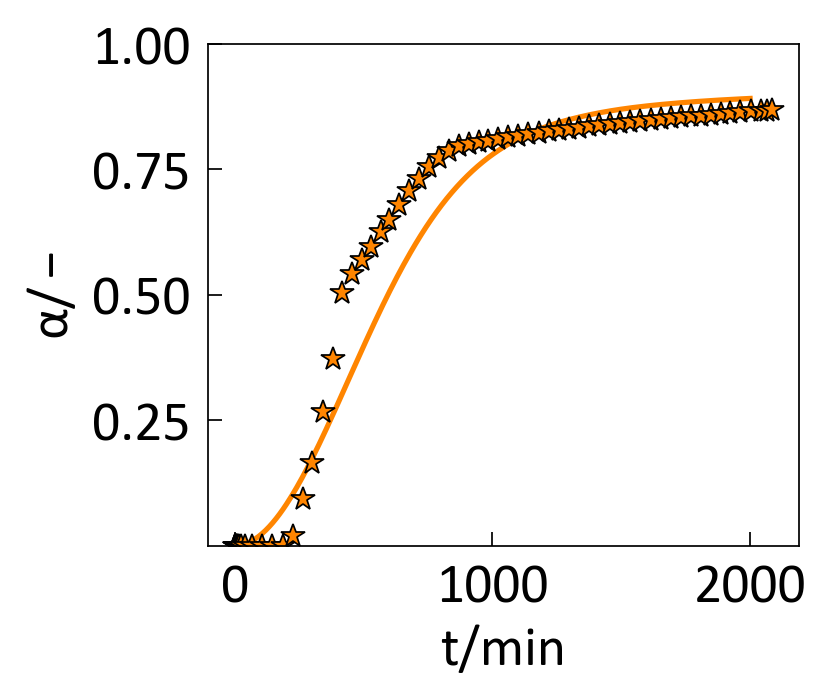

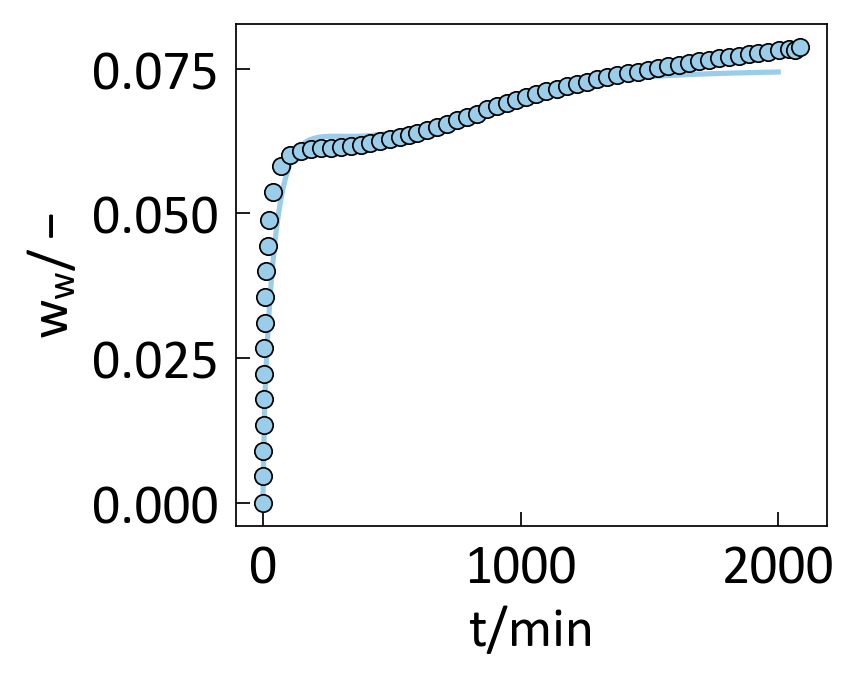

In [4]:

wt,wtz,zvec,Lt,alpha=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,saftpar=par,**crystpar,maxiter=None)



alphaB=np.average(alpha,axis=0)
fig,ax=plt.subplots()
fig1,ax1=plt.subplots()
ax.plot(t/60,alphaB,'C3-')
ax.plot(texp,alphaexp,'C3*',markersize=7)
ax.set_yticks([0.25,0.5,0.75,1])
ax.set_ylim([0,1])
ax.set_xlabel('t/min')
ax.set_ylabel(r'$\alpha/-$')

XwL=wt[:,0]/(1-wt[:,0])
Xw=XwL*(1-alphaB*dl0)
ww=Xw/(1+Xw)
ax1.plot(t/60,ww,'C1-')
ax1.plot(texp,wwexp,'C1o')
ax1.set_xlabel('t/min')
ax1.set_ylabel('$w_w/-$')
# pd.DataFrame((tmin,ww)).T.to_clipboard(excel=True, sep=None, index=False, header=None)

